In [40]:
#Necessary libraries needed for the project

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import os
import re

print(os.getcwd())

/home/ssg145/final


# Download & Clean Each Data Set

We have 3 different data sets that we are using for the project.
1. Coffee Quality Data
- From the Coffee Quality Data we extracted the Country Name, No. of Bags, Harvest Year and Bag Weight.
2. Meat Production Data
- From the Meat Dataset we focused on analyzing Country, Year, and Production in tonns
3. CO2 Emmisions
- From the CO2 Emmisions dataset we focused on the Country, Year, and the CO2 Emissions in kiloton (kt)
4. Milk Production Dataset
- From the Milk Production Dataset 

## Coffee Quality Dataset

In [66]:
project_dir = os.getcwd()

# Construct the full path to the CSV file
file_path = os.path.join(project_dir, 'coffee.csv')

# Read the CSV file
coffee_df = pd.read_csv(file_path)

#Rename the country column
coffee_df = coffee_df.rename(columns={'Country of Origin': 'Country'})

#coffee_df['Bag Weight'] = coffee_df['Bag Weight'].str.replace('kg', '').astype(float)
coffee_df['Bag Weight'] = coffee_df['Bag Weight'].str.replace(r'\s*[Kk][Gg]', '', regex=True).astype(float)
coffee_df['Coffee amt'] = coffee_df['Bag Weight'] * coffee_df['Number of Bags']

#CLEANING UP THE DATA (getting rid of unneccessary info ie. columns)
dimensions = coffee_df.shape
print("Dimensions before Cleaning:", dimensions)
print(coffee_df.head(6))


#coffee_df = coffee_df[["Country", "Number of Bags", "Bag Weight", "Harvest Year", "Coffee amt"]]#Taking only the columns we need
#Have to get rid of year column since its type is an object unless we strip it 
coffee_df = coffee_df[["Country", "Number of Bags", "Bag Weight", "Coffee amt"]]

#Finding the average of coffee amt 
coffee_df_avg = coffee_df.groupby('Country', as_index=False).mean()
print("\nAverage production of coffee based on country:\n",coffee_df_avg)

dimensions = coffee_df.shape
print("\nDimensions after Cleaning:",dimensions)
print(coffee_df.head(6))
coffee_df.to_csv('output.csv', index=False)

#May want to drop all the columns except the country name, no. of bags, harvest year and bag weight.

Dimensions before Cleaning: (207, 42)
   Unnamed: 0  ID     Country                 Farm Name  \
0           0   0    Colombia          Finca El Paraiso   
1           1   1      Taiwan  Royal Bean Geisha Estate   
2           2   2        Laos        OKLAO coffee farms   
3           3   3  Costa Rica                 La Cumbre   
4           4   4    Colombia           Finca Santuario   
5           5   5   Guatemala                 La Colina   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   
5  The 2022 Pacific Rim Coffee Summit,GT02                  Dinámica Café   

  ICO Nu

### Null/Missing Values

In [73]:
#Finding Missing Values
#Column 1
missing_countries = coffee_df["Country"].isnull().sum()
print("Amount of Missing Values for Column 1:", missing_countries)

#Column 2
missing_bags = coffee_df["Number of Bags"].isnull().sum()
print("Amount of Missing Values for Column 2:", missing_bags)

#Column 3
missing_weight = coffee_df["Coffee amt"].isnull().sum()
print("Amount of Missing Values for Column 3:", missing_weight)

#Column 4
#missing_year = coffee_df["Harvest Year"].isnull().sum()
#print("Amount of Missing Values for Column 4:", missing_year)

#Finding Null Values

Amount of Missing Values for Column 1: 0
Amount of Missing Values for Column 2: 0
Amount of Missing Values for Column 3: 0


## Meat Dataset

In [65]:
project_dir = os.getcwd()

# Construct the full path to the CSV file
file_path = os.path.join(project_dir, 'meat.csv')
meat_df = pd.read_csv(file_path)
#df = pd.read_csv('/home/ssg145/final/meat.csv')
initial_size = meat_df.shape[0]

dimensions = meat_df.shape
print("Dimensions before Cleaning:", dimensions)
print(meat_df.head(6))

#CLEANING UP DATA
meat_df = meat_df.drop(columns=['Code'])
#print(df.head(6))

meat_df = meat_df.rename(columns={'Meat, total | 00001765 || Production | 005510 || tonnes': 'Production amt'})

#Averaging the data
meat_df_avg = meat_df.groupby('Country', as_index=False).mean()
print("\nAverage production of meat based on country:\n", meat_df_avg)

dimensions = meat_df.shape
print("\nDimensions after Cleaning:", dimensions)
print(meat_df.head(6))


Dimensions before Cleaning: (14382, 4)
               Country Code  Year  \
0              Bahamas  BHS  1961   
1               Brunei  BRN  1961   
2                Qatar  QAT  1961   
3        Faroe Islands  FRO  1961   
4               Tuvalu  TUV  1961   
5  Antigua and Barbuda  ATG  1961   

   Meat, total | 00001765 || Production | 005510 || tonnes  
0                                             1260.7        
1                                             1289.8        
2                                             1769.2        
3                                                0.0        
4                                               30.0        
5                                              395.0        

Average production of meat based on country:
           Country    Year  Production amt
0     Afghanistan  1991.5    2.521045e+05
1          Africa  1991.5    1.031934e+07
2    Africa (FAO)  1991.5    1.076151e+07
3         Albania  1991.5    5.788725e+04
4         Algeria

### Null/Missing Values

In [17]:
#Finding Missing Values
#Column 1
missing_countries = meat_df["Country"].isnull().sum()
print("Amount of Missing Values for Column 1:", missing_countries)

#Column 2
missing_year = meat_df["Year"].isnull().sum()
print("Amount of Missing Values for Column 2:", missing_year)

#Column 3
missing_production = meat_df["Production amt"].isnull().sum()
print("Amount of Missing Values for Column 3:", missing_production)

#Finding Null Values: there are country values that are continents or low income/high income countries
print(meat_df.shape)
bad_values = ["Asia", "North America", "Africa", "South America", "Europe", "Antartica", "World", "Lower-middle-income countries", "Upper-middle-income countries", "High-income countries", "Low-income countries"]
meat_df = meat_df[~meat_df["Country"].str.contains("|".join(bad_values), case = False, na = False)]
print(meat_df.shape)

Amount of Missing Values for Column 1: 0
Amount of Missing Values for Column 2: 0
Amount of Missing Values for Column 3: 0
(14382, 3)
(12429, 3)


## CO2 Emmissions Dataset

In [67]:
#df = pd.read_csv('./final/co2_country.csv')
project_dir = os.getcwd()

# Construct the full path to the CSV file
file_path = os.path.join(project_dir, 'co2_country.csv')
df_co2 = pd.read_csv(file_path)

dimensions = df_co2.shape
print("Dimensions before Cleaning:", dimensions)
print(df_co2.head(6))

#Rename the country column 
df_co2 = df_co2.rename(columns={'country_name': 'Country'})
df_co2 = df_co2.rename(columns={'value': 'co2_value'})

#Clean the data (get rid of the country codes)
df_co2 = df_co2.iloc[:, 1:]

#Averaging the country
co2_df_avg = df_co2.groupby('Country', as_index=False).mean()
print("\nAverage production of co2 based on country:\n",co2_df_avg)

dimensions = df_co2.shape
print("\nDimensions before Cleaning:", dimensions)
print(df_co2.head(6))

Dimensions before Cleaning: (13953, 4)
  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743
5          ABW        Aruba  1965  10623.299

Average production of co2 based on country:
                          Country    year     co2_value
0                    Afghanistan  1989.5  2.505611e+03
1    Africa Eastern and Southern  1989.5  3.463568e+05
2     Africa Western and Central  1989.5  1.075567e+05
3                        Albania  1989.5  4.413947e+03
4                        Algeria  1989.5  7.031805e+04
..                           ...     ...           ...
251           West Bank and Gaza  2003.0  1.754320e+03
252                        World  1989.5  2.195928e+07
253                  Yemen, Rep.  1989.5  8.619050e+03
254                       Zambia  1991.5  3.369701

### Null/Missing Values

In [29]:
#Finding Missing Values
#Column 1
missing_countries = df_co2["Country"].isnull().sum()
print("Amount of Missing Values for Column 1:", missing_countries)

#Column 2
missing_year = df_co2["year"].isnull().sum()
print("Amount of Missing Values for Column 2:", missing_year)

#Column 3
missing_value = df_co2["co2_value"].isnull().sum()
print("Amount of Missing Values for Column 3:", missing_value)


Amount of Missing Values for Column 1: 0
Amount of Missing Values for Column 2: 0
Amount of Missing Values for Column 3: 0


## Milk Production Dataset

In [68]:
project_dir = os.getcwd()

# Construct the full path to the CSV file
file_path = os.path.join(project_dir, 'milk.csv')
milk_df = pd.read_csv(file_path)
#df = pd.read_csv('/home/ssg145/final/meat.csv')
initial_size = milk_df.shape[0]

#print(df.head(6))

#Rename the country column
milk_df = milk_df.rename(columns={'Milk | 00001780 || Production | 005510 || tonnes': 'Milk amt'})
milk_df = milk_df.rename(columns={'Entity': 'Country'})

#CLEANING UP DATA
dimensions = milk_df.shape
print("Dimensions before Cleaning:", dimensions)
print(milk_df.head(6))
milk_df = milk_df.drop(columns=['Code'])

#Averaging the values
milk_df_avg = milk_df.groupby('Country', as_index=False).mean()
print("\nAverage production of milk based on country:\n",milk_df_avg)

dimensions = milk_df.shape
print("\nDimensions after Cleaning:", dimensions)
print(milk_df.head(6))


Dimensions before Cleaning: (13615, 4)
       Country Code  Year  Milk amt
0  Afghanistan  AFG  1961  574900.0
1  Afghanistan  AFG  1962  576700.0
2  Afghanistan  AFG  1963  646700.0
3  Afghanistan  AFG  1964  659900.0
4  Afghanistan  AFG  1965  720900.0
5  Afghanistan  AFG  1966  750500.0

Average production of milk based on country:
           Country    Year      Milk amt
0     Afghanistan  1991.5  1.265143e+06
1          Africa  1991.5  2.433064e+07
2    Africa (FAO)  1991.5  2.721962e+07
3         Albania  1991.5  6.674705e+05
4         Algeria  1991.5  1.616004e+06
..            ...     ...           ...
237         World  1991.5  5.686591e+08
238         Yemen  1991.5  2.171429e+05
239    Yugoslavia  1976.0  3.730219e+06
240        Zambia  1991.5  2.253068e+05
241      Zimbabwe  1991.5  3.951674e+05

[242 rows x 3 columns]

Dimensions after Cleaning: (13615, 3)
       Country  Year  Milk amt
0  Afghanistan  1961  574900.0
1  Afghanistan  1962  576700.0
2  Afghanistan  1963  6467

### Null/Missing Values

In [31]:
#Finding Missing Values
#Column 1
missing_countries = milk_df["Country"].isnull().sum()
print("Amount of Missing Values for Column 1:", missing_countries)

#Column 2
missing_year = milk_df["Year"].isnull().sum()
print("Amount of Missing Values for Column 2:", missing_year)

#Column 3
missing_value = milk_df["Milk amt"].isnull().sum()
print("Amount of Missing Values for Column 3:", missing_value)


Amount of Missing Values for Column 1: 0
Amount of Missing Values for Column 2: 0
Amount of Missing Values for Column 3: 0


### Join Datasets Using SQL

### Perform Analysis

### Prediction Model

In [52]:
#Non-average code
#df_merged = pd.merge(coffee_df, meat_df, on='Country', how='inner')
#df_merged = pd.merge(df_merged, df_co2, on='Country', how='inner')
#df_merged = pd.merge(df_merged, milk_df, on='Country', how='inner')

df_merged = pd.merge(coffee_df_avg, meat_df_avg, on='Country', how='inner')
df_merged = pd.merge(df_merged, co2_df_avg, on='Country', how='inner')
df_merged = pd.merge(df_merged, milk_df_avg, on='Country', how='inner')
print(df_merged.head(6))

dimensions = df_merged.shape
print(dimensions)

#Transforming data to reduce the scale 

# Create a copy of the original dataframe for transformations
df_transformed = df_merged.copy()

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Step 1: Log Transformation for all features
df_transformed['log_feature_1'] = np.log1p(df_merged['Coffee amt'])
df_transformed['log_feature_2'] = np.log1p(df_merged['Production amt'])
df_transformed['log_feature_3'] = np.log1p(df_merged['co2_value'])
df_transformed['log_feature_4'] = np.log1p(df_merged['Milk amt'])

# Step 2: Min-Max Scaling for log-transformed features
df_transformed['minmax_scaled_1'] = min_max_scaler.fit_transform(df_transformed[['log_feature_1']])
df_transformed['minmax_scaled_2'] = min_max_scaler.fit_transform(df_transformed[['log_feature_2']])
df_transformed['minmax_scaled_3'] = min_max_scaler.fit_transform(df_transformed[['log_feature_3']])
df_transformed['minmax_scaled_4'] = min_max_scaler.fit_transform(df_transformed[['log_feature_4']])

# Step 3: Standardization (Z-score Normalization) for log-transformed features
df_transformed['standardized_1'] = standard_scaler.fit_transform(df_transformed[['log_feature_1']])
df_transformed['standardized_2'] = standard_scaler.fit_transform(df_transformed[['log_feature_2']])
df_transformed['standardized_3'] = standard_scaler.fit_transform(df_transformed[['log_feature_3']])
df_transformed['standardized_4'] = standard_scaler.fit_transform(df_transformed[['log_feature_4']])

print(df_transformed['log_feature_4'].head(6))

       Country  Number of Bags   Bag Weight    Coffee amt  Year_x  \
0       Brazil      566.900000    49.000000  3.203250e+04  1991.5   
1     Colombia      161.263158    35.789474  8.500632e+03  1991.5   
2   Costa Rica      180.250000    43.250000  8.876750e+03  1991.5   
3  El Salvador      214.000000    23.571429  7.940143e+03  1991.5   
4     Ethiopia      240.181818  3529.545455  1.126351e+06  2007.5   
5    Guatemala      306.285714    37.428571  1.168429e+04  1991.5   

   Production amt    year      co2_value  Year_y      Milk amt  
0    1.247870e+07  1989.5  236581.910936  1991.5  1.868037e+07  
1    1.347802e+06  1989.5   49571.564504  1991.5  4.403544e+06  
2    1.550788e+05  1989.5    3949.669359  1991.5  5.805105e+05  
3    8.994718e+04  1989.5    3803.565942  1991.5  3.154205e+05  
4    6.396513e+05  1989.5    4091.344007  2007.5  2.771252e+06  
5    2.238047e+05  1989.5    6792.301133  1991.5  3.268330e+05  
(18, 10)
0    16.742984
1    15.297920
2    13.271665
3    12

Text(0, 0.5, 'Frequency')

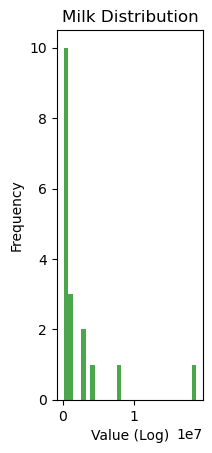

In [70]:
#Log Plot before transformed
plt.subplot(1, 3, 2)
plt.hist(df_merged['Milk amt'], bins=30, color='green', alpha=0.7)
plt.title('Milk Distribution')
plt.xlabel('Value (Log)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

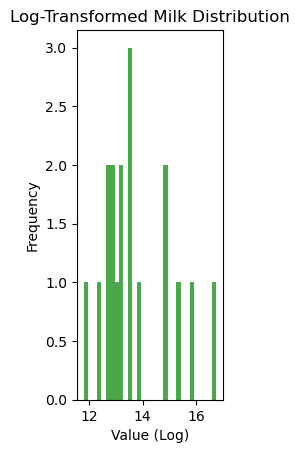

In [71]:
#Log Plot after fully transformed
plt.subplot(1, 3, 2)
plt.hist(df_transformed['log_feature_4'], bins=30, color='green', alpha=0.7)
plt.title('Log-Transformed Milk Distribution')
plt.xlabel('Value (Log)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

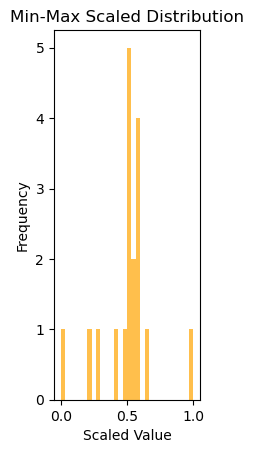

In [55]:
#Min-Max Plot
plt.subplot(1, 3, 3)
plt.hist(df_transformed['minmax_scaled_1'], bins=30, color='orange', alpha=0.7)
plt.title('Min-Max Scaled Distribution')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')

In [60]:
#Perform Analysis
#x= df_merged[['Coffee amt', 'Production amt', 'Milk amt']]
#y= df_merged['co2_value']

#x= df_transformed[['log_feature_1', 'log_feature_2', 'log_feature_4']]
#y= df_transformed['log_feature_3']

#x= df_transformed[['minmax_scaled_1', 'minmax_scaled_2', 'minmax_scaled_4']]
#y= df_transformed['minmax_scaled_3']

x= df_transformed[['standardized_1', 'standardized_2', 'standardized_4']]
y= df_transformed['standardized_3']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
print("Coefficient (Slope):", model.coef_)
print("Intercept:", model.intercept_)



Coefficient (Slope): [-0.03194076  1.10871651 -0.21982635]
Intercept: 0.0013746199058126685


In [37]:
#df1 = pd.DataFrame(data1)
#df2 = pd.DataFrame(data2)

# Create SQLite database in memory
conn = sqlite3.connect(':memory:')

# Write DataFrames to SQLite tables
coffee_df.to_sql('table1', conn, index=False, if_exists='replace')
meat_df.to_sql('table2', conn, index=False, if_exists='replace')
milk_df.to_sql('table3', conn, index=False, if_exists='replace')
df_co2.to_sql('table4', conn, index=False, if_exists='replace')

print(coffee_df.head(6))
print("Schema of table1:")
print(pd.read_sql_query("PRAGMA table_info(table1);", conn))
print("\nSchema of table2:")
print(pd.read_sql_query("PRAGMA table_info(table2);", conn))
print("\nSchema of table3:")
print(pd.read_sql_query("PRAGMA table_info(table3);", conn))
print("\nSchema of table4:")
print(pd.read_sql_query("PRAGMA table_info(table4);", conn))

query = "SELECT * FROM table1"
df = pd.read_sql_query(query, conn)
print(df)


      Country  Number of Bags  Bag Weight Harvest Year  Coffee amt
0    Colombia               1        35.0  2021 / 2022        35.0
1      Taiwan               1        80.0  2021 / 2022        80.0
2        Laos              19        25.0  2021 / 2022       475.0
3  Costa Rica               1        22.0         2022        22.0
4    Colombia               2        24.0         2022        48.0
5   Guatemala               5        30.0         2022       150.0
Schema of table1:
   cid            name     type  notnull dflt_value  pk
0    0         Country     TEXT        0       None   0
1    1  Number of Bags  INTEGER        0       None   0
2    2      Bag Weight     REAL        0       None   0
3    3    Harvest Year     TEXT        0       None   0
4    4      Coffee amt     REAL        0       None   0

Schema of table2:
   cid            name     type  notnull dflt_value  pk
0    0         Country     TEXT        0       None   0
1    1            Year  INTEGER        0      

In [38]:
query = '''
SELECT table1.Country, table1."Coffee amt", table2."Production amt", table3."Milk amt", table4.co2_value
FROM table1
LEFT JOIN table2 ON table1.Country = table2.Country
LEFT JOIN table3 ON table1.Country = table3.Country
LEFT JOIN table4 ON table1.Country = table4.Country
'''

# Execute the query and load the result into a DataFrame
final_df = pd.read_sql_query(query, conn)
final_df.dropna(inplace=True)

# Close the connection
conn.close()

# Display the merged DataFrame
if final_df is not None:
    print(final_df)
    

           Country  Coffee amt  Production amt    Milk amt      co2_value
0         Colombia        35.0        442045.0   1762000.0   16409.825000
1         Colombia        35.0        442045.0   1762000.0   18217.656000
2         Colombia        35.0        442045.0   1762000.0   19442.434000
3         Colombia        35.0        442045.0   1762000.0   21257.599000
4         Colombia        35.0        442045.0   1762000.0   21708.640000
...            ...         ...             ...         ...            ...
28747462    Brazil     36000.0      30397944.0  36667944.0  454230.010986
28747463    Brazil     36000.0      30397944.0  36667944.0  456489.990234
28747464    Brazil     36000.0      30397944.0  36667944.0  485339.996338
28747465    Brazil     36000.0      30397944.0  36667944.0  486839.996338
28747466    Brazil     36000.0      30397944.0  36667944.0  511619.995117

[28501440 rows x 5 columns]


In [62]:
y_pred = model.predict(x_test)

# Evaluate the model using R-squared, Mean Absolute Error, and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Optionally, you can also print the first few predictions compared to the true values
comparison = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
print(comparison.head())

R-squared: 0.9019957131974331
Mean Absolute Error (MAE): 0.22269508355952805
Mean Squared Error (MSE): 0.07100066952382011
   True Values  Predicted Values
0     1.627503          2.085264
1     0.726604          0.499823
8    -0.383668         -0.457120
5    -0.419074         -0.551860


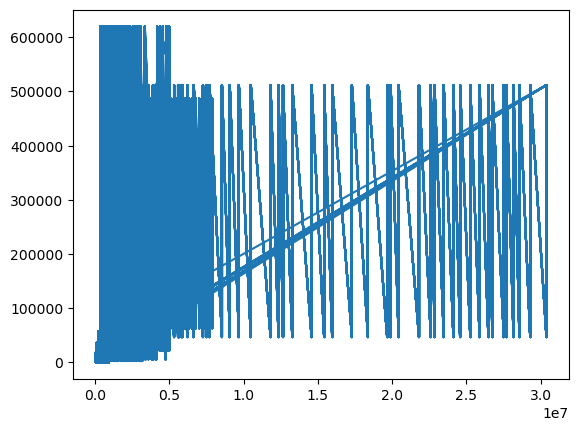

In [51]:
#Graphing 
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()